# **Multiple Linear Regression**

## Importing the libraries

In [ ]:
#importing numpy library for numerical calculation
import numpy as np

#importing pandas library for accessing the dataset and performing manipulations
import pandas as pd

#importing matplotlib for plotting functions
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
#importing the dataset using pandas library
dataset = pd.read_csv('Diesel_Price_Train.csv')

#printing the initial values of our dataset
dataset.head()

,Date,Delhi Diesel Price,Foreign Exchange Rate,Crude Oil Price
0,01-01-2003,19.47,48.01,29.59
1,02-01-2003,19.47,48.05,29.59
2,03-01-2003,19.07,48.00,29.59
3,04-01-2003,19.07,48.00,29.59
4,05-01-2003,19.07,48.00,29.59


In [ ]:
#printing the whole dataset consisting of approx 5300 records
dataset

,Date,Delhi Diesel Price,Foreign Exchange Rate,Crude Oil Price
0,01-01-2003,19.47,48.01,29.59
1,02-01-2003,19.47,48.05,29.59
2,03-01-2003,19.07,48.00,29.59
3,04-01-2003,19.07,48.00,29.59
4,05-01-2003,19.07,48.00,29.59
...,...,...,...,...
5294,30-06-2017,53.46,64.73,46.56
5295,01-07-2017,53.33,64.73,47.86
5296,02-07-2017,53.36,64.73,47.86
5297,03-07-2017,53.47,64.66,47.86


In [ ]:
# Printing the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299 entries, 0 to 5298
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5299 non-null   object 
 1   Delhi Diesel Price     5299 non-null   float64
 2   Foreign Exchange Rate  5299 non-null   float64
 3   Crude Oil Price        5299 non-null   float64
dtypes: float64(3), object(1)
memory usage: 165.7+ KB


In [ ]:
# describe the dataset
dataset.describe()

,Delhi Diesel Price,Foreign Exchange Rate,Crude Oil Price
count,5299.000000,5299.000000,5299.000000
mean,38.082433,51.257207,70.719891
std,11.191295,8.732785,28.862465
min,19.070000,39.040000,24.210000
25%,30.450000,44.800000,46.590000
50%,37.750000,46.890000,66.900000
75%,48.010000,60.330000,101.570000
max,59.020000,68.810000,132.470000


## Checking for Outliers using BoxPlot Method

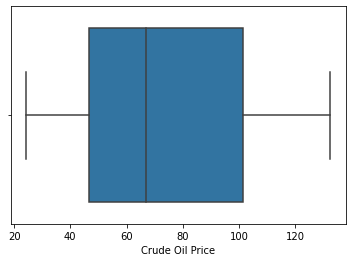

In [ ]:
#importing the seaborn library
import seaborn as sns

#Plotting the boxplot for Crude Oil Price
sns.boxplot(x = dataset['Crude Oil Price'])

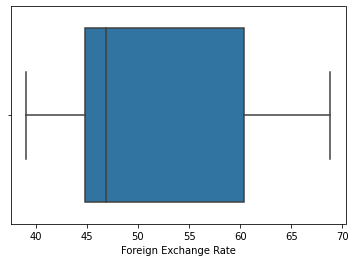

In [ ]:
#Plotting the boxplot for Forex Rate
sns.boxplot(x = dataset['Foreign Exchange Rate'])

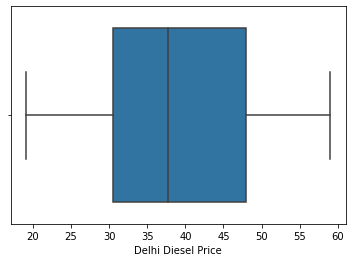

In [ ]:
#Plotting the boxplot for Delhi Diesel Price
sns.boxplot(x = dataset['Delhi Diesel Price'])

## Splitting the independent (X) and dependent variables (y)

In [ ]:
# X consists of independent variable (Forex Rate and Crude Oil Price)
# y is the dependent variable (diesel price)
X = dataset.iloc[:, 2: ].values
y = dataset.iloc[:, dataset.columns == 'Delhi Diesel Price'].values


In [ ]:
#printing the independent variables (Forex Rate and Crude Oil Price)
print(X)

[[48.01 29.59]
 [48.05 29.59]
 [48.   29.59]
 ...
 [64.73 47.86]
 [64.66 47.86]
 [64.81 47.86]]


In [ ]:
#printing the dependent variable (diesel price)
print(y)

[[19.47]
 [19.47]
 [19.07]
 ...
 [53.36]
 [53.47]
 [53.44]]


## Splitting the dataset into the Training set and Test set

In [ ]:
#importing the sklearn libary for perfroming train test split
from sklearn.model_selection import train_test_split

#splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Printing the dimensions of training and testing set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4239, 2)
(4239, 1)
(1060, 2)
(1060, 1)


## Plotting the correlation heatmap for the dataset

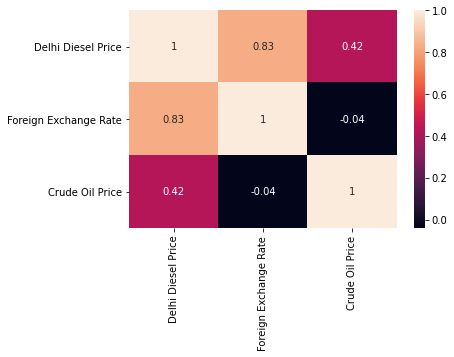

In [ ]:
#Finding the correlation between our dataset
corr = dataset.corr()

#Importing the seaborn library for plotting the correlation martix
import seaborn as sns
sns.heatmap(corr, annot = True)

## Training the Simple Linear Regression model on the Training set

In [ ]:
#importing the linear regression module from sklearn libary
from sklearn.linear_model import LinearRegression

#getting the linear regression model function for our regressor
regressor = LinearRegression()

#training the model using linear regression on training set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Diesel Prices on the Test set

In [ ]:
#predicting the values(diesel prices) on our test dataset 
#using the multiple linear regression model
y_pred = regressor.predict(X_test)

#set the precision upto 2 decimal places
np.set_printoptions(precision = 2)

#Print the predicted values and actual values of the test dataset
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[28.25 30.76]
 [47.73 48.16]
 [53.56 59.02]
 ...
 [52.69 50.84]
 [38.52 41.12]
 [39.22 34.8 ]]


##Printing the Coefficients of Multilinear Model

In [ ]:
#Printing the coefficients related with our model
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[1.09 0.18]]


In [ ]:
#Printing the intercept of the model
print('Intercepts : \n', regressor.intercept_)

Intercepts : 
 [-29.9]


## Relationship between dependent and independent variables
Diesel Prices = 1.09 x (Forex Rate) + 0.18 x (Crude Oil Price) - 29.9

In [ ]:
#Print the variance score of our model
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Variance score: 0.90


In [ ]:
#Print the Mean Squared Error of our Model
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

Mean squared error: 13.14


## **Finding the Individual Relationship of Diesel Price on Crude Oil and Forex Rate**

## Relationship between Diesel Price and Forex Rate

In [ ]:
# Training the new model by considering only Forex Rate as independent variable 
# and Diesel as dependent variable
Forex_train = X_train[:, 0:1]
regressor.fit(Forex_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

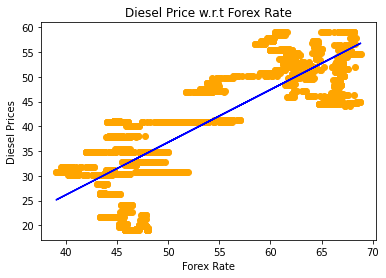

In [ ]:
#Plot of Diesel Price w.r.t Forex Rate
plt.scatter(Forex_train, y_train, color = 'orange')
plt.plot(Forex_train, regressor.predict(Forex_train), color = 'blue')
plt.title('Diesel Price w.r.t Forex Rate')
plt.xlabel('Forex Rate')
plt.ylabel('Diesel Prices')
plt.show()

## Relationship between Diesel Price and Crude Oil Price


In [ ]:
# Training the new model by considering only Crude Oil as independent variable 
# and Diesel as dependent variable
Crude_train = X_train[:, 1:]
regressor.fit(Crude_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

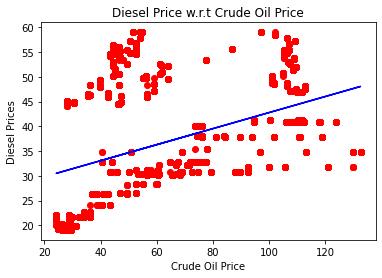

In [ ]:
#Plot of Diesel Price w.r.t Forex Rate
plt.scatter(Crude_train, y_train, color = 'red')
plt.plot(Crude_train, regressor.predict(Crude_train), color = 'blue')
plt.title('Diesel Price w.r.t Crude Oil Price')
plt.xlabel('Crude Oil Price')
plt.ylabel('Diesel Prices')
plt.show()

## Visualising Our Multiple Linear Regression Model using 3D Plot

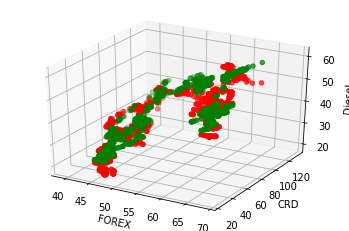

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c = 'r', marker = 'o')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c = 'g', marker = 'o')
ax.set_xlabel('FOREX')
ax.set_ylabel('CRD')
ax.set_zlabel('Diesel')
plt.draw()

## Regression Metrics for Model Peformance

In [ ]:
#printing the maximum predicted diesel price on test set
print(max(y_pred))

#printing the maximum actual diesel price on test set
print(max(y_test))

[60.9]
[59.02]


In [ ]:
#Printing the Mean Absolute Error using sklearn library
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  2.9960182186261273


In [ ]:
#Printing the Mean Squared Error using sklearn library
from sklearn.metrics import mean_squared_error
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))

Mean Squared Error :  13.142888688530956


In [ ]:
#Printing the Root Mean Squared Error using sklearn library
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error : ", mean_squared_error(y_test, y_pred, squared = False))

Root Mean Squared Error :  3.625312219455168


In [ ]:
#Printing the R2 value using sklearn library
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.8974
